# Churn Customer Modelling

Various models will be explored and compared in this project in order to find the best model for this classsification problem. The predicted feature will be if a customer will churn (exit) or not. Logistic Regression, Gradient Boost, Random Forest and MLP will be used for modelling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve
from imblearn.over_sampling import RandomOverSampler

from main import over_sampling, train_models, split_and_scale, preprocessing

import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Preprocessing and Data Split

In [6]:
df = preprocessing(df)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [7]:
X_train, X_test, y_train, y_test = split_and_scale(df)

In [8]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
2228,-0.060429,-1.086281,-0.185279,1.028680,-1.226424,0.798528,0.641985,-1.019038,-1.376867,1.002002,-0.583509,-0.572731
5910,-1.743631,-1.086281,0.005323,0.334765,-1.226424,-0.915051,0.641985,0.981317,-1.312339,1.002002,-0.583509,-0.572731
1950,0.311322,-1.086281,-0.185279,1.722596,0.761149,-0.915051,0.641985,-1.019038,-0.318843,1.002002,-0.583509,-0.572731
2119,0.414586,0.920572,-0.947689,-0.012193,-1.226424,0.798528,0.641985,-1.019038,0.147481,1.002002,-0.583509,-0.572731
5947,0.063488,-1.086281,0.577131,0.681722,1.116374,-0.915051,0.641985,0.981317,1.727595,1.002002,-0.583509,-0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.297936,0.920572,0.767733,0.681722,0.497175,-0.915051,0.641985,0.981317,-0.579444,-0.998002,1.713770,-0.572731
7813,0.352627,-1.086281,2.292554,-0.706109,0.077888,-0.915051,0.641985,-1.019038,-0.529960,-0.998002,1.713770,-0.572731
905,0.228710,-1.086281,0.577131,1.375638,-1.226424,-0.915051,0.641985,0.981317,-0.140485,1.002002,-0.583509,-0.572731
5192,0.135773,-1.086281,0.005323,1.028680,-1.226424,0.798528,0.641985,0.981317,0.018567,1.002002,-0.583509,-0.572731


### Model Training and Results

In [9]:
log_pred, grad_pred, forest_pred, mlp_pred  = train_models(X_train, X_test, y_train, y_test)

In [10]:
log_accuracy, log_f1 = accuracy_score(y_test, log_pred), f1_score(y_test, log_pred)
grad_accuracy, grad_f1 = accuracy_score(y_test, grad_pred), f1_score(y_test, grad_pred)
forest_accuracy, forest_f1 = accuracy_score(y_test, forest_pred), f1_score(y_test, forest_pred)
mlp_accuracy, mlp_f1 = accuracy_score(y_test, mlp_pred), f1_score(y_test, mlp_pred)

In [11]:
print("Logistic Model accuracy: {}       Logistic Model F1 Score {}".format(round(log_accuracy,3), round(log_f1,4)))
print("Gradient Model accuracy: {}       Gradient Model F1 Score {}".format(round(grad_accuracy,3), round(grad_f1,4)))
print("  Forest Model accuracy: {}         Forest Model F1 Score {}".format(round(forest_accuracy,3), round(forest_f1,4)))
print("     MLP Model accuracy: {}            MLP Model F1 Score {}".format(round(mlp_accuracy,3), round(mlp_f1,4)))

Logistic Model accuracy: 0.812       Logistic Model F1 Score 0.3201
Gradient Model accuracy: 0.865       Gradient Model F1 Score 0.5956
  Forest Model accuracy: 0.861         Forest Model F1 Score 0.5792
     MLP Model accuracy: 0.857            MLP Model F1 Score 0.59


### Oversampling 

In [12]:
X_train_oversample, y_train_oversample = over_sampling(X_train, y_train)

In [13]:
log_pred_os, grad_pred_os, forest_pred_os, mlp_pred_os  = train_models(X_train_oversample, X_test, y_train_oversample, y_test)

In [14]:
log_accuracy_os, log_f1_os = accuracy_score(y_test, log_pred_os), f1_score(y_test, log_pred_os)
grad_accuracy_os, grad_f1_os = accuracy_score(y_test, grad_pred_os), f1_score(y_test, grad_pred_os)
forest_accuracy_os, forest_f1_os = accuracy_score(y_test, forest_pred_os), f1_score(y_test, forest_pred_os)
mlp_accuracy_os, mlp_f1_os = accuracy_score(y_test, mlp_pred_os), f1_score(y_test, mlp_pred_os)

In [15]:
print("Logistic Model Oversample accuracy: {}       Logistic Model Oversample F1 Score {}".format(round(log_accuracy_os,3), round(log_f1_os,4)))
print("Gradient Model Oversample accuracy: {}       Gradient Model Oversample F1 Score {}".format(round(grad_accuracy_os,3), round(grad_f1_os,4)))
print("  Forest Model Oversample accuracy: {}         Forest Model Oversample F1 Score {}".format(round(forest_accuracy_os,3), round(forest_f1_os,4)))
print("     MLP Model Oversample accuracy: {}            MLP Model Oversample F1 Score {}".format(round(mlp_accuracy_os,3), round(mlp_f1_os,4)))

Logistic Model Oversample accuracy: 0.72       Logistic Model Oversample F1 Score 0.5003
Gradient Model Oversample accuracy: 0.804       Gradient Model Oversample F1 Score 0.6122
  Forest Model Oversample accuracy: 0.854         Forest Model Oversample F1 Score 0.6016
     MLP Model Oversample accuracy: 0.798            MLP Model Oversample F1 Score 0.5862


### Comparing the Results

Logistic Regression performed pretty poorly normally and with oversampling. Gradient Boosting performed best overall and showed improvements with oversampling. All models except MLP improved their f1 score with oversampling, logistic regression benefiting the most but is still far behind the performance of the other models. Now we will look further into the top 3 models.

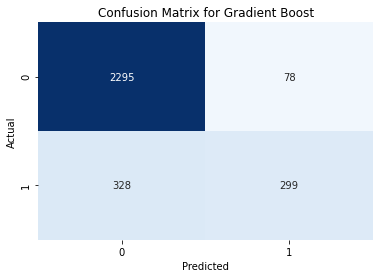

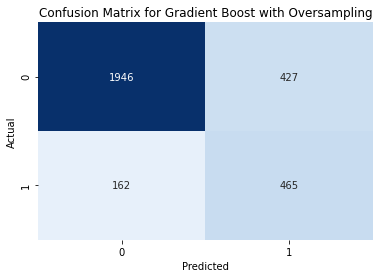

In [16]:
con_matrix = confusion_matrix(y_test, grad_pred)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boost")
plt.show()

con_matrix = confusion_matrix(y_test, grad_pred_os)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boost with Oversampling")
plt.show()

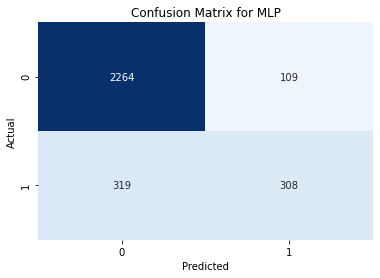

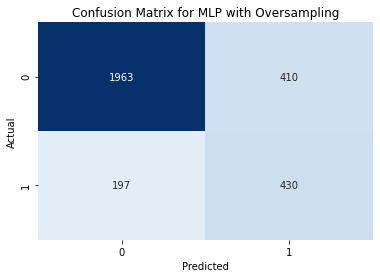

In [17]:
con_matrix = confusion_matrix(y_test, mlp_pred)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MLP")
plt.show()

con_matrix = confusion_matrix(y_test, mlp_pred_os)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MLP with Oversampling")
plt.show()

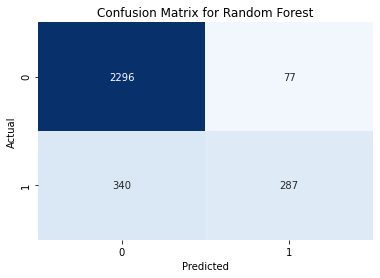

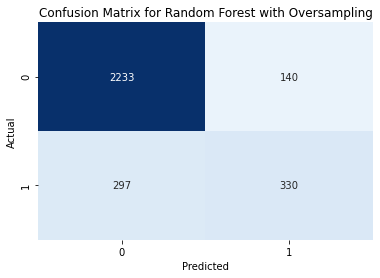

In [18]:
con_matrix = confusion_matrix(y_test, forest_pred)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

con_matrix = confusion_matrix(y_test, forest_pred_os)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest with Oversampling")
plt.show()

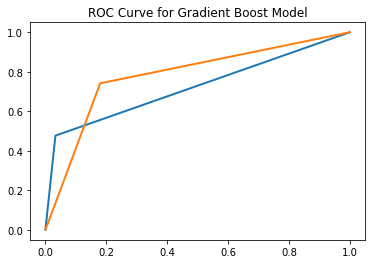

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, grad_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for Gradient Boost Model");
fpr, tpr, thresholds = roc_curve(y_test, grad_pred_os)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for Gradient Boost Model");

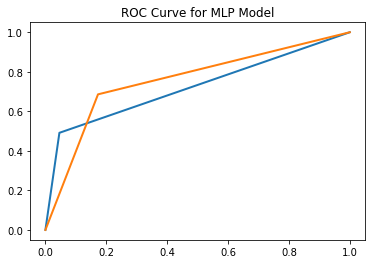

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, mlp_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for MLP Model");

fpr, tpr, thresholds = roc_curve(y_test, mlp_pred_os)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for MLP Model");

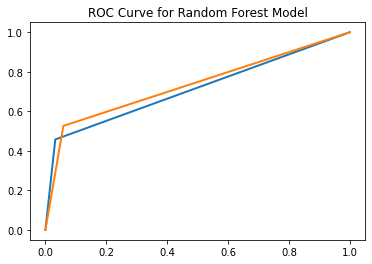

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, forest_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for Random Forest Model");

fpr, tpr, thresholds = roc_curve(y_test, forest_pred_os)
plt.plot(fpr, tpr, linewidth=2)
plt.title("ROC Curve for Random Forest Model");

As we can see from the maxtric and roc curves above. All 3 models correctly identified more churn customers with oversampling. However, there was a big increase in wrongly predicted churn customers too. 

In [22]:
print("Classification Report for Gradient Boost Oversampling:")
print("----------------------------------------------------------------------------")
print(classification_report(y_test, grad_pred_os, target_names=["No Churn", "Churn"]))

Classification Report for Gradient Boost Oversampling:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.92      0.82      0.87      2373
       Churn       0.52      0.74      0.61       627

    accuracy                           0.80      3000
   macro avg       0.72      0.78      0.74      3000
weighted avg       0.84      0.80      0.81      3000



In [23]:
print("Classification Report for Gradient Boost:")
print("----------------------------------------------------------------------------")
print(classification_report(y_test, grad_pred, target_names=["No Churn", "Churn"]))

Classification Report for Gradient Boost:
----------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.87      0.97      0.92      2373
       Churn       0.79      0.48      0.60       627

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.86      0.85      3000



From the two reports above for gradient boost model. We can see the precision/recall trade off. For this case, we would prefer a higher recall because then we are able to correctly identify the customers who will churn and have a chance to retain them. This comes at a higher marketing cost if we have to unnecessarily target customers who are not likely to churn.